# Energy Efficiency of Residential Buildings

# A. Problem Understanding

When it comes to efficient building design, the computation of the heating load (HL) and the cooling load (CL) is
required to determine the specifications of the heating and cooling equipment needed to maintain comfortable indoor
air conditions. In order to estimate the required cooling and heating capacities, architects and building desioners
need information about the characteristics of the building and of the conditioned space (for example occupancy and
activity level). For this reason, we will investigate the effect of eight input variables: (RC), surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the output variables HL and CL of residential buildings.

To evaluate our model performance we will use R squared (R2 score). R-squared is a statistical measure of how close the data are to the fitted regression line. This is very important to create predictions that are close to the real values. In this case we want to achieve a high R squared, the higher the R squared, the better the model fits the data.

# B. Data Understanding

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

#### 1. Data Description

**ENB2012_data.xlsx**

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. 

Specifically: 
* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
* X4	Roof Area 
* X5	Overall Height 
* X6	Orientation 
* X7	Glazing Area 
* X8	Glazing Area Distribution 
* y1	Heating Load 
* y2	Cooling Load

In [3]:
# Install all required packages
!pip install -q pandas pandas-profiling numpy matplotlib seaborn


^C


#### 2. Load The Data

In [6]:
#import library
import pandas as pd
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
#import data
data = pd.read_csv('../data/ENB2012_data.csv')

In [7]:
# Read the data to g an overview
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [8]:
#Rename columns
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

#### 3. Data Types 

In [9]:
# Memory usage and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


# C. Data Exploration

On the data exploration, we will see the distribution of each variable using a histogram. In the histogram, the horizontal axis is the data of the feature while the vertical axis is the frequency of occurrence. The correlation test is used to evaluate the relationship between two numerical variables. If two variables have a correlation coefficient, then the two variables are numerical variables, while the remainder are categorical variables.

Let's get an overview of variables and its distribution.

From the above distributions, an interesting fact is that the unique value of the data are not so many
* X1	Relative Compactness has 12 possible values
* X2	Surface Area has 12 possible values
* X3	Wall Area has 7 possible values
* X4	Roof Area has 4 possible values
* X5	Overall Height has 2 possible values
* X6	Orientation has 4 possible values
* X7	Glazing Area has 4 possible values
* X8	Glazing Area Distribution has 6 possible values
* y1	Heating Load has 586 possible values
* y2	Cooling Load has 636 possible values

Now, we want to know the correlation between variables in numbers

<Axes: >

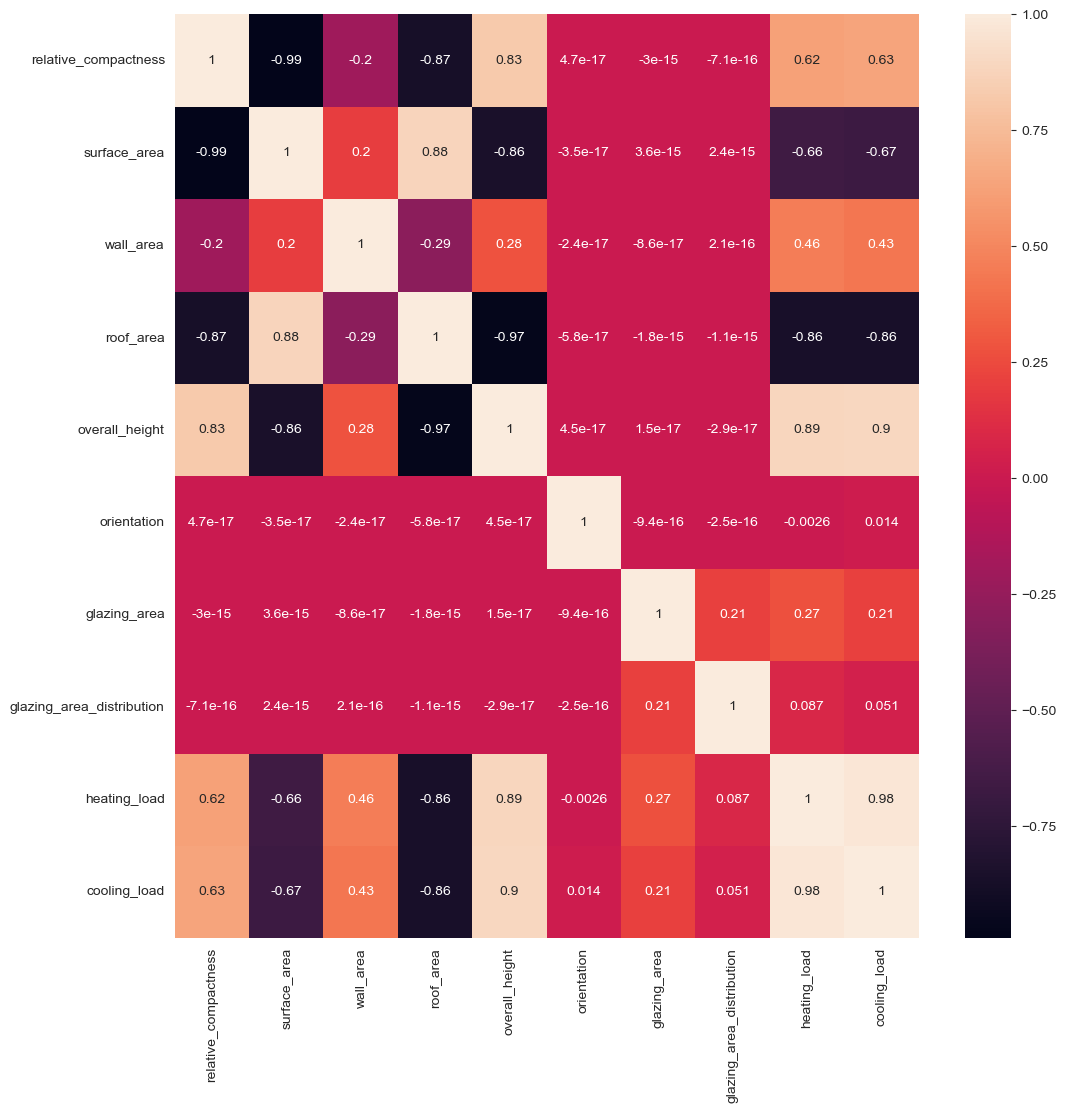

In [11]:
# Preview correlation
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

Because it's still difficult to read, we want to format it and check the correlation again.

In [12]:
# Change number format in correlations
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))
data.corr()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
surface_area,-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
wall_area,-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
roof_area,-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
overall_height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,-0.00,0.89,0.90
orientation,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
glazing_area,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.21,0.27,0.21
glazing_area_distribution,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
heating_load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
cooling_load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


The tables shows that there is a strong correlation between targets. We cannot exclude one of those, because heating load and cooling are equally important outputs to be predicted.

<Figure size 500x500 with 0 Axes>

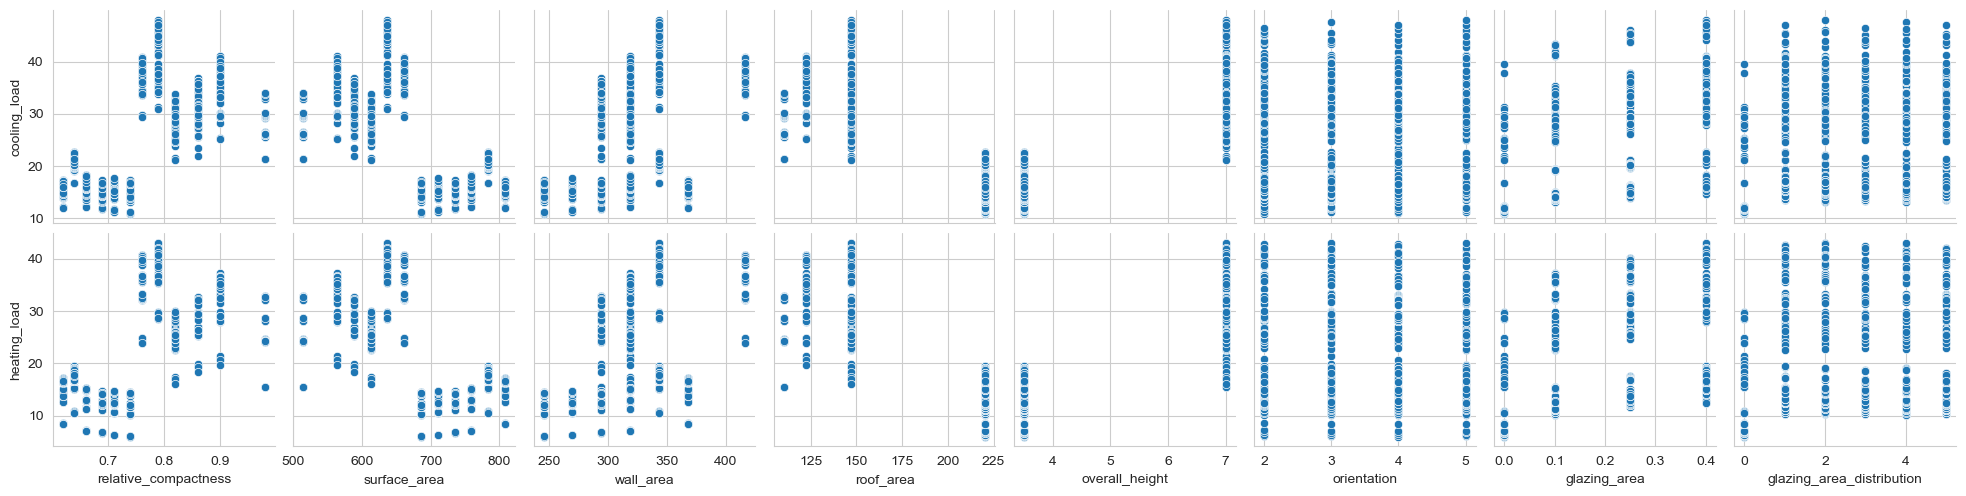

In [13]:
# Correlation between inputs and outputs
plt.figure(figsize=(5,5))
sns.pairplot(data=data, y_vars=['cooling_load','heating_load'],
             x_vars=['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution',])
plt.show()

From the table, we can see some information about correlations between all variables. For example, the overall_height (an input) has a strong correlation (0.90) with the output - cooling_load. Besides, the pairplot depicts the the relationship between them. For the overall_height and cooling_load plot, there is only 2 values of overall height due to the distribution and made us difficult to see the linear correlations of those variables. We will use preprocessing method to refine the distributions.

# D. Data Preprocessing

#### 1. Data Selection

Considering the distribution and correlation on our exploration of the data, we well use all vales as we want to create the best fit for prediction lines by evaluating R squared. R squared will always increase as we add more independent variables. To get a high R, we includes all variables.

#### 2. Preprocessing & Data Transformation

In [14]:
# Check missing values
data.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [15]:
#Summary statistics
data.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.76,671.71,318.50,176.60,5.25,3.50,0.23,2.81,22.31,24.59
std,0.11,88.09,43.63,45.17,1.75,1.12,0.13,1.55,10.09,9.51
min,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.01,10.90
25%,0.68,606.38,294.00,140.88,3.50,2.75,0.10,1.75,12.99,15.62
50%,0.75,673.75,318.50,183.75,5.25,3.50,0.25,3.00,18.95,22.08
75%,0.83,741.12,343.00,220.50,7.00,4.25,0.40,4.00,31.67,33.13
max,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,43.10,48.03


Each feature has different scale, as we can see the minimum and maximum values for each of variables. To obtain a better scale, it is good to normalize the data because it makes distributions better.

In [16]:
#Normalize the inputs and set the output
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)

X = data.drop(['heating_load','cooling_load'], axis=1)
X = nr.fit_transform(X)
y = data[['heating_load','cooling_load']]